In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('/content/Dataset.csv')
data.head()

,Unnamed: 0,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,Salary,AISelect,AISent,AIBen,WorkExp,Industry
0,1,0,1,2,1,18,9,30,4,0,1,177,131,285000.0,2,1,3,10.0,4
1,2,0,3,0,1,27,23,11,6,2,0,177,131,250000.0,0,6,5,23.0,4
2,3,0,1,0,1,12,7,14,3,2,1,177,131,156000.0,0,6,5,7.0,12
3,4,0,1,2,1,6,4,15,5,2,1,130,101,1320000.0,2,4,4,6.0,9
4,5,0,2,2,6,21,21,11,3,1,3,175,44,78000.0,2,0,4,22.0,9


In [26]:
data

,Unnamed: 0,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,Salary,AISelect,AISent,AIBen,WorkExp,Industry
0,1,0,1,2,1,18,9,30,4,0,1,177,131,2.850000e+05,2,1,3,10.0,4
1,2,0,3,0,1,27,23,11,6,2,0,177,131,2.500000e+05,0,6,5,23.0,4
2,3,0,1,0,1,12,7,14,3,2,1,177,131,1.560000e+05,0,6,5,7.0,12
3,4,0,1,2,1,6,4,15,5,2,1,130,101,1.320000e+06,2,4,4,6.0,9
4,5,0,2,2,6,21,21,11,3,1,3,175,44,7.800000e+04,2,0,4,22.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32610,89174,0,0,1,1,5,1,15,5,1,3,124,102,1.200000e+06,2,1,2,2.0,7
32611,89175,0,1,2,1,10,8,17,1,2,1,177,131,1.350000e+05,2,0,4,8.0,4
32612,89177,0,2,2,2,17,11,15,3,1,3,106,90,1.000000e+06,1,1,2,12.0,1
32613,89178,0,3,2,1,25,22,15,2,1,3,177,131,2.120210e+05,1,0,3,22.0,5


In [3]:
data.shape

(32615, 19)

In [4]:
data.describe()

,Unnamed: 0,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,Salary,AISelect,AISent,AIBen,WorkExp,Industry
count,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,3.261500e+04,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000
mean,41767.300629,0.114058,1.475333,1.011896,2.198068,15.249977,10.304737,14.301180,3.400153,1.226123,1.688119,112.055803,73.837958,3.066105e+16,1.137023,2.848475,3.487444,11.441852,5.705473
std,24822.256550,0.463803,0.950674,0.929234,1.811386,9.450674,8.209923,5.443715,2.114499,0.768296,1.028799,59.779365,43.984239,5.537214e+18,0.849008,2.536114,1.374306,8.829642,3.633957
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20745.000000,0.000000,1.000000,0.000000,1.000000,8.000000,4.000000,11.000000,2.000000,1.000000,1.000000,59.000000,41.000000,6.500000e+04,0.000000,0.000000,2.000000,5.000000,4.000000
50%,40434.000000,0.000000,1.000000,1.000000,1.000000,13.000000,8.000000,15.000000,3.000000,1.000000,1.000000,124.000000,48.000000,1.200000e+05,1.000000,4.000000,4.000000,9.000000,4.000000
75%,62130.500000,0.000000,2.000000,2.000000,2.000000,20.000000,14.000000,15.000000,5.000000,2.000000,3.000000,177.000000,131.000000,2.500000e+05,2.000000,6.000000,5.000000,16.000000,9.000000
max,89183.000000,2.000000,7.000000,3.000000,7.000000,51.000000,51.000000,33.000000,10.000000,3.000000,3.000000,184.000000,142.000000,1.000000e+21,2.000000,6.000000,5.000000,50.000000,12.000000


In [16]:
data.isna().sum()

,0
Unnamed: 0,0
MainBranch,0
Age,0
RemoteWork,0
EdLevel,0
YearsCode,0
YearsCodePro,0
DevType,0
OrgSize,0
PurchaseInfluence,0


In [17]:
print(data.OrgSize.value_counts())

OrgSize
5     7480
3     6771
2     4223
0     3952
4     2986
1     2821
7     2422
6     1427
8      356
9      162
10      15
Name: count, dtype: int64


In [18]:
print(data.Industry.value_counts())

Industry
4     13437
12     4964
1      3431
9      2998
7      1988
2      1694
10     1544
3       868
0       609
5       574
8       207
6       166
11      135
Name: count, dtype: int64


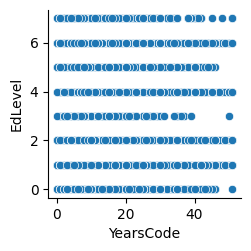

In [7]:
sns.pairplot(y_vars = 'EdLevel', x_vars = 'YearsCode' ,data = data)

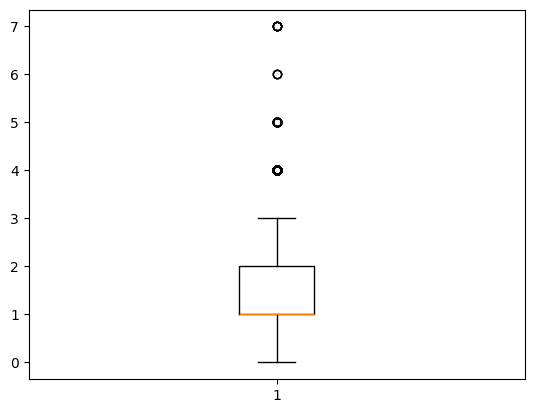

In [29]:
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['Age'])
plt.show()

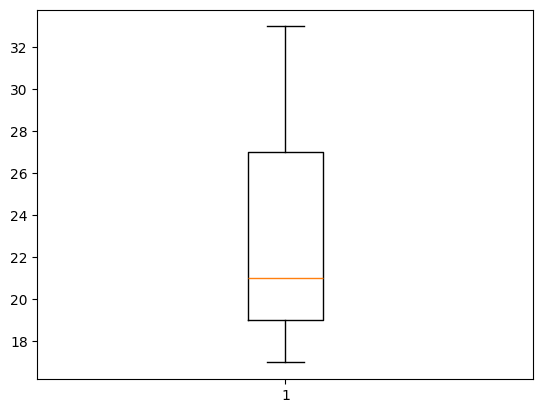

In [30]:
plt.boxplot(data['DevType'])
plt.show()

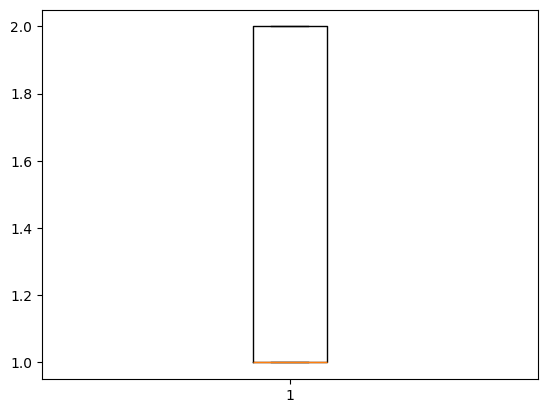

In [40]:
data=data[(data['Age']<=3)&(data['Age']>=1)]
plt.boxplot(data['Age'])
plt.show()

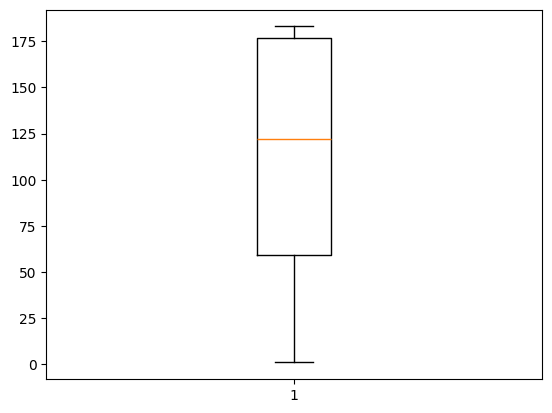

In [41]:
plt.boxplot(data['Country'])
plt.show()

In [42]:
data=data.drop(columns=['MainBranch'])# checking the correlation of the data


In [43]:
data

,Unnamed: 0,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,Salary,AISelect,AISent,AIBen,WorkExp,Industry
0,1,1,2,1,18,9,30,4,0,1,177,131,285000.0,2,1,3,10.0,4
31,51,1,1,1,4,2,17,5,2,1,155,75,500000.0,2,1,2,4.0,9
52,139,2,2,2,20,16,24,7,1,3,146,107,10000000.0,1,4,4,16.0,4
60,159,1,0,1,13,11,21,0,0,1,131,103,200000.0,2,4,2,11.0,4
63,163,1,2,1,14,10,19,0,2,1,136,106,15000.0,2,4,4,10.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32601,89156,1,2,1,12,8,21,3,1,3,177,131,195000.0,2,0,3,8.0,4
32602,89157,1,2,1,17,12,17,0,2,1,30,24,430000.0,1,4,3,12.0,4
32603,89160,1,0,4,9,5,17,0,1,3,106,90,500000.0,1,4,2,5.0,10
32607,89170,1,0,2,18,9,24,7,1,3,56,41,60000.0,2,3,3,9.0,9


In [44]:
data.corr()

,Unnamed: 0,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,Salary,AISelect,AISent,AIBen,WorkExp,Industry
Unnamed: 0,1.000000,-0.045084,-0.033476,-0.012551,-0.068313,-0.068416,0.032184,-0.011290,-0.001599,-0.001772,0.011341,0.046770,0.005297,0.075559,-0.025772,-0.054221,-0.036165,0.001684
Age,-0.045084,1.000000,0.023036,0.081300,0.565415,0.598362,0.114709,-0.006713,-0.052845,-0.074121,0.043716,0.012353,-0.013054,-0.040052,0.012370,-0.009292,0.656900,-0.018999
RemoteWork,-0.033476,0.023036,1.000000,-0.000696,0.030516,0.050804,-0.087157,0.039416,-0.005361,0.001187,0.096472,0.143135,0.000552,0.030799,0.017516,-0.001175,0.058868,-0.008088
EdLevel,-0.012551,0.081300,-0.000696,1.000000,0.087164,0.079703,0.119547,-0.005601,-0.048443,-0.027080,-0.057815,-0.085106,0.016458,-0.010370,0.050993,-0.015829,0.099336,0.010556
YearsCode,-0.068313,0.565415,0.030516,0.087164,1.000000,0.828381,0.202203,-0.028408,-0.112223,-0.147759,0.021356,-0.008196,0.014945,-0.078883,0.047839,-0.005758,0.738286,-0.039642
YearsCodePro,-0.068416,0.598362,0.050804,0.079703,0.828381,1.000000,0.159741,-0.008289,-0.137653,-0.171624,0.023910,0.009549,-0.013362,-0.037044,0.024408,-0.036191,0.860383,-0.053618
DevType,0.032184,0.114709,-0.087157,0.119547,0.202203,0.159741,1.000000,0.016066,-0.239786,-0.138320,-0.006301,-0.004729,0.017051,0.006995,0.029934,-0.015735,0.189570,-0.024578
OrgSize,-0.011290,-0.006713,0.039416,-0.005601,-0.028408,-0.008289,0.016066,1.000000,-0.039036,-0.044838,-0.070966,-0.025320,-0.023694,0.024091,-0.002389,-0.010866,0.004459,0.002342
PurchaseInfluence,-0.001599,-0.052845,-0.005361,-0.048443,-0.112223,-0.137653,-0.239786,-0.039036,1.000000,-0.109591,0.032636,0.016185,0.015654,-0.089199,0.029529,0.065061,-0.133077,0.057269
TechList,-0.001772,-0.074121,0.001187,-0.027080,-0.147759,-0.171624,-0.138320,-0.044838,-0.109591,1.000000,-0.025934,-0.040428,-0.008004,-0.079121,0.032614,0.057186,-0.165017,-0.010549


In [45]:
X = data['YearsCode']
y = data['Salary']
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train.shape

(3095,)

In [46]:
X_test.shape

(1327,)

In [47]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

In [48]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9644
Date:                Sun, 20 Jul 2025   Prob (F-statistic):              0.326
Time:                        05:57:18   Log-Likelihood:            -1.0598e+05
No. Observations:                3095   AIC:                         2.120e+05
Df Residuals:                    3093   BIC:                         2.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.545e+12   7.62e+12     -0.465      0.6

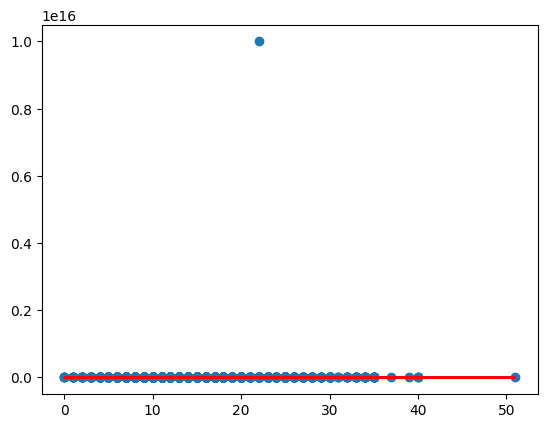

In [49]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 25200 + X_train * 9731.2038,'r')
plt.show()

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()                       #create object
data['Salary']=encoder.fit_transform(data['Salary'])
data['YearsCodePro']=encoder.fit_transform(data['YearsCodePro'])
data['RemoteWork']=encoder.fit_transform(data['RemoteWork'])
data['DevType']=encoder.fit_transform(data['DevType'])
data['PurchaseInfluence']=encoder.fit_transform(data['PurchaseInfluence'])
data['OrgSize']=encoder.fit_transform(data['OrgSize'])
data['Industry']=encoder.fit_transform(data['Industry'])

In [51]:
data

,Unnamed: 0,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,Salary,AISelect,AISent,AIBen,WorkExp,Industry
0,1,1,2,1,18,9,13,4,0,1,177,131,490,2,1,3,10.0,4
31,51,1,1,1,4,2,0,5,2,1,155,75,559,2,1,2,4.0,9
52,139,2,2,2,20,16,7,7,1,3,146,107,769,1,4,4,16.0,4
60,159,1,0,1,13,11,4,0,0,1,131,103,420,2,4,2,11.0,4
63,163,1,2,1,14,10,2,0,2,1,136,106,48,2,4,4,10.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32601,89156,1,2,1,12,8,4,3,1,3,177,131,412,2,0,3,8.0,4
32602,89157,1,2,1,17,12,0,0,2,1,30,24,544,1,4,3,12.0,4
32603,89160,1,0,4,9,5,0,0,1,3,106,90,559,1,4,2,5.0,10
32607,89170,1,0,2,18,9,7,7,1,3,56,41,165,2,3,3,9.0,9


In [52]:
x=data.drop(columns=['Industry'])
y=data['Industry']
x

,Unnamed: 0,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,Salary,AISelect,AISent,AIBen,WorkExp
0,1,1,2,1,18,9,13,4,0,1,177,131,490,2,1,3,10.0
31,51,1,1,1,4,2,0,5,2,1,155,75,559,2,1,2,4.0
52,139,2,2,2,20,16,7,7,1,3,146,107,769,1,4,4,16.0
60,159,1,0,1,13,11,4,0,0,1,131,103,420,2,4,2,11.0
63,163,1,2,1,14,10,2,0,2,1,136,106,48,2,4,4,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32601,89156,1,2,1,12,8,4,3,1,3,177,131,412,2,0,3,8.0
32602,89157,1,2,1,17,12,0,0,2,1,30,24,544,1,4,3,12.0
32603,89160,1,0,4,9,5,0,0,1,3,106,90,559,1,4,2,5.0
32607,89170,1,0,2,18,9,7,7,1,3,56,41,165,2,3,3,9.0


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.4237
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        15
           4       0.43      0.99      0.60       379
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        57
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00       107
          10       0.00      0.00      0.00        34
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00       122

    accuracy                           0.42       885
   macro avg       0.03      0.08      0.05       885
weighted avg       0.18      0.42      0.26       885



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForest Accuracy: 0.4079
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.19      0.04      0.07        91
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        15
           4       0.44      0.91      0.60       379
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         6
           7       0.33      0.04      0.06        57
           8       0.00      0.00      0.00         4
           9       0.24      0.05      0.08       107
          10       0.17      0.03      0.05        34
          11       0.00      0.00      0.00         4
          12       0.08      0.03      0.05       122

    accuracy                           0.41       885
   macro avg       0.11      0.08      0.07       885
weighted avg       0.28      0.41      0.28       885

KNN Accuracy: 0.3153
              precision    r

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

SVM Accuracy: 0.4282
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        15
           4       0.43      1.00      0.60       379
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        57
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00       107
          10       0.00      0.00      0.00        34
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00       122

    accuracy                           0.43       885
   macro avg       0.03      0.08      0.05       885
weighted avg       0.18      0.43      0.26       885



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GradientBoosting Accuracy: 0.4056
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.35      0.09      0.14        91
           2       0.25      0.05      0.08        44
           3       0.29      0.13      0.18        15
           4       0.44      0.89      0.59       379
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         6
           7       1.00      0.02      0.03        57
           8       0.00      0.00      0.00         4
           9       0.25      0.04      0.07       107
          10       0.07      0.03      0.04        34
          11       0.00      0.00      0.00         4
          12       0.10      0.02      0.04       122

    accuracy                           0.41       885
   macro avg       0.21      0.10      0.09       885
weighted avg       0.35      0.41      0.29       885



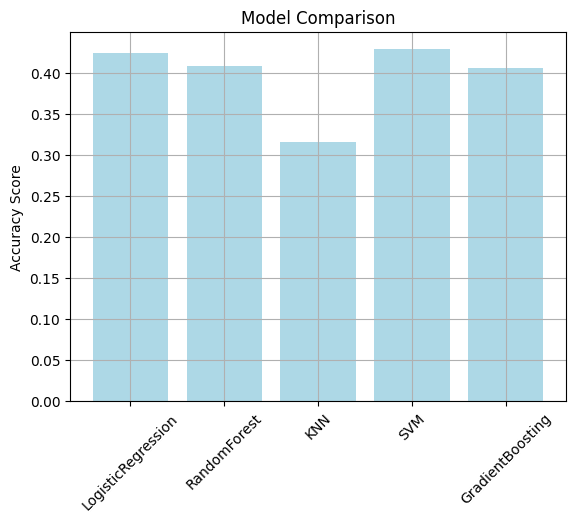

In [57]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='lightblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<Axes: ylabel='count'>

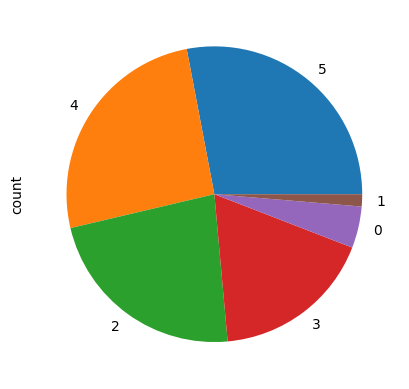

In [63]:
data['AIBen'].value_counts().sort_values(ascending=False).plot(kind="pie")

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")


model_name = max(results, key=results.get)
model = models[model_name]
print(f"\n✅ model: {model_name} with accuracy {results[model_name]:.4f}")

# Save the model
joblib.dump(model, "model.pkl")
print("✅ Saved  model as model.pkl")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.4282
RandomForest: 0.4181
KNN: 0.3028
SVM: 0.4282
GradientBoosting: 0.4034

✅ model: LogisticRegression with accuracy 0.4282
✅ Saved  model as model.pkl


In [65]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


In [70]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Prediction App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")
age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write(" Input Data")
st.write(input_df)

if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅✅✅Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅✅✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')


Overwriting app.py
